# Overview of approach used for detecting objects

We have been tasked with developing an application which can identify objects such as luggage, notes, food items etc in a static image. Once detected, the review is forwarded to the correct processing department. Let's start by learning how to use a YOLO model.  

Note:  YOLO stands for <I> 'You Only Look Once'.</I>

In this notebook we use a pre-trained machine learning model, YOLOv8m and explore how it works on static images. If it can detect an object then we can retrain the model to detect objects of various types. 

To begin, we will install the ultralytics package for YOLO models and import some python packages:

In [1]:
# If you did not use the Workbench image designed for this Lab, you can uncomment and run the following line to install the required packages.
# !pip install --no-cache-dir --no-dependencies -r requirements.txt

import cv2
from ultralytics import YOLO
from PIL import Image

In [2]:
# We are going to use the YOLOv8m model for object detection
model = YOLO('yolov8m.pt')

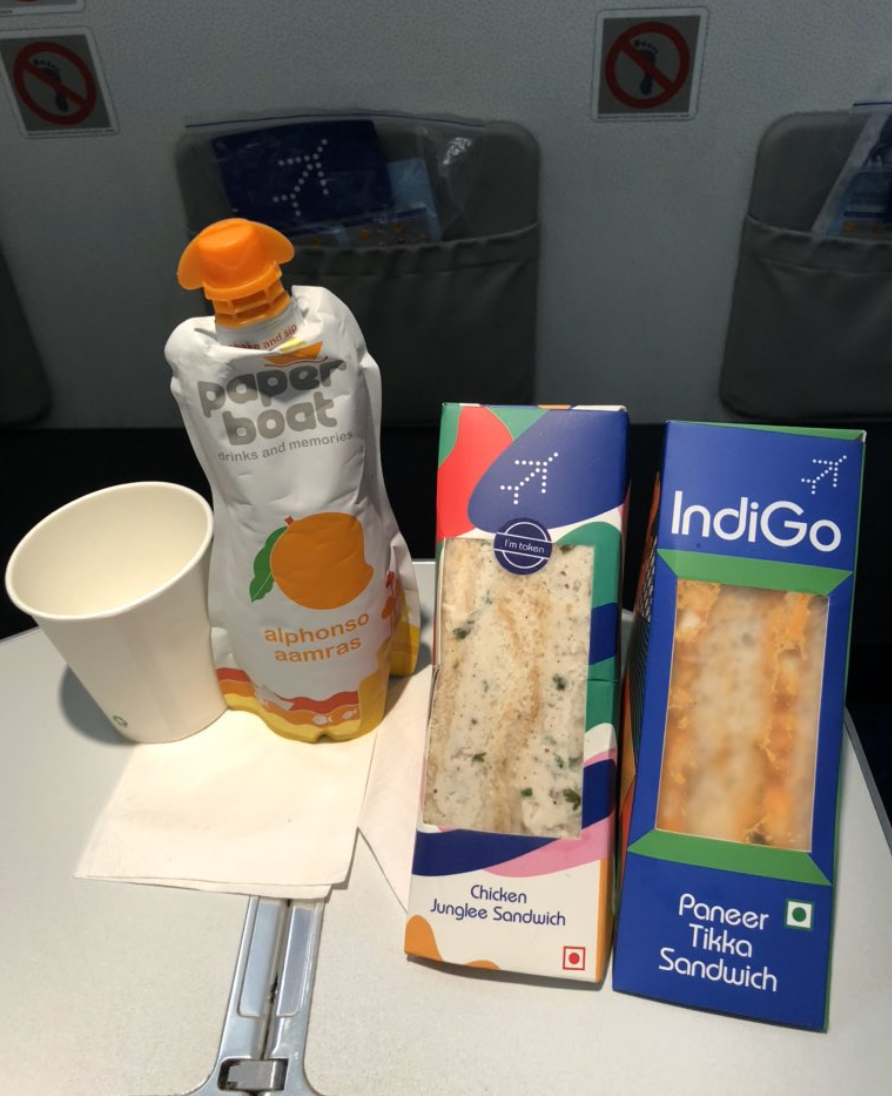

In [3]:
# Display the image we wish to test
Image.open("images/items-2.jpg")

In [4]:
# Test that the YOLO model can identify the object in the given photo
results = model.predict("images/items-2.jpg")


image 1/1 /opt/app-root/src/sentiments/lab-materials/04/images/items-2.jpg: 640x544 1 handbag, 1 bottle, 1 cup, 1 dining table, 1278.7ms
Speed: 2.7ms preprocess, 1278.7ms inference, 1306.7ms postprocess per image at shape (1, 3, 640, 544)


We see that YOLO has determined that there is '1 object' in the provided photo.  This is great news for us.  We can test out a few more photos to make certain YOLO is detecting objects.  Then we can write some code to draw boxes around the object YOLO detected for us.

In [5]:
# List all the images in our <images> folder. We can then pick one of those images for our tests.
!ls -al images

total 6440
drwxrwsrwx. 2 1001430000 1001430000    4096 Aug 12 13:07 .
drwxrwsrwx. 4 1001430000 1001430000    4096 Aug 12 13:07 ..
-rw-r--r--. 1 1001430000 1001430000   65788 Aug 12 13:07 bad-Unknown-5.jpeg
-rw-r--r--. 1 1001430000 1001430000   85832 Aug 12 13:07 bad-Unknown-6.jpeg
-rw-r--r--. 1 1001430000 1001430000   73775 Aug 12 13:07 bad-Unknown-7.jpeg
-rw-r--r--. 1 1001430000 1001430000   61319 Aug 12 13:07 bad-Unknown.jpeg
-rw-rw-rw-. 1 1001430000 1001430000 2437511 Aug 12 09:15 carImage0.jpg
-rw-rw-rw-. 1 1001430000 1001430000  410294 Aug 12 09:15 carImage1.jpg
-rw-rw-rw-. 1 1001430000 1001430000 1441542 Aug 12 09:15 carImage3.jpg
-rw-rw-rw-. 1 1001430000 1001430000  564139 Aug 12 09:15 carImage4.jpg
-rw-r--r--. 1 1001430000 1001430000   34983 Aug 12 13:07 good-images-2.jpeg
-rw-r--r--. 1 1001430000 1001430000   36202 Aug 12 13:07 good-images-4.jpeg
-rw-r--r--. 1 1001430000 1001430000   22998 Aug 12 13:07 good-images-5.jpeg
-rw-r--r--. 1 1001430000 1001430000 1328460 Aug 12 13:07

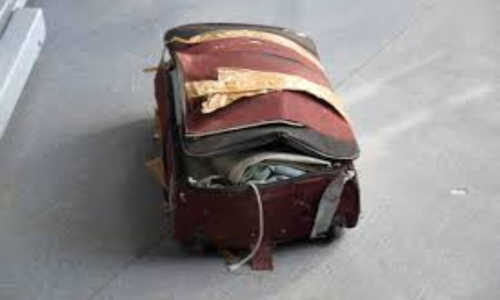

In [6]:
# Choose an image,  eg <carImage4.jpg>, and see if yolo can determine if the image contains an automobile.
img = Image.open('images/bad-Unknown-5.jpeg')
img_resized = img.resize((500, 300))
display(img_resized)

In [7]:
# Obtain the results for the model prediction
results = model.predict(img)


0: 640x640 1 suitcase, 1096.6ms
Speed: 2.3ms preprocess, 1096.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


If we look at the results for Image3.jpg, we see that yolo has determined that there are 2 cups, 2 spoons, 3 bowls, 1 carrot, 1 dining table.  This result is interesting.  We have confirmed that the yolo model can identify multiple 'objects' in an image.

However, with so many objects displayed in the image, it may now be difficult for us, 'the humans', to accurately count all of the objects!

Therefore let's write some code that will draw boxes around the objects that the yolo model identifies within an image.

**Please open the notebook `04-02-car-recog.ipynb`**.